In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load the dataset.
dataset= pd.read_csv('Weather.csv')
dataset.head(5)

/usr/local/Cellar/jupyterlab/2.0.1/libexec/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Explore the data by checking the number of rows and columns
dataset.shape

(119040, 31)

In [4]:
# Describe Statistical details. 
dataset.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


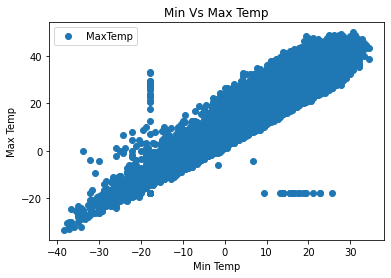

In [5]:
# Plot the data for Max and Min

dataset.plot(x='MinTemp', y='MaxTemp', style='o')
plt.title('Min Vs Max Temp')
plt.xlabel('Min Temp')
plt.ylabel('Max Temp')
plt.show()

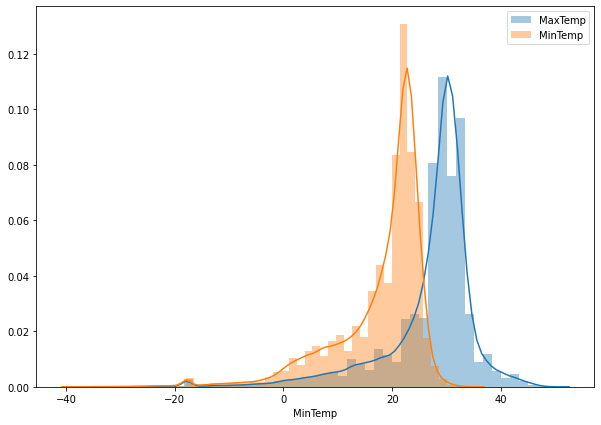

In [6]:
# Lets observe the Average Max Temparature.

import seaborn as seabornInstance
plt.figure(figsize=(10,7))
plt.tight_layout()
seabornInstance.distplot(dataset['MaxTemp'])
seabornInstance.distplot(dataset['MinTemp'])
plt.legend(labels=['MaxTemp','MinTemp'])

Average MAX temperature found in between 25 and 35


In [7]:
#Divide the dataset into Independent variable and Dependent varibales(Values to be predicted).
#We want to predit Max temperature depending on Min Temperature. 

X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)
print(X)
print('--------')
print(y)



[[22.22222222]
 [21.66666667]
 [22.22222222]
 ...
 [18.33333333]
 [18.33333333]
 [17.22222222]]
--------
[[25.55555556]
 [28.88888889]
 [26.11111111]
 ...
 [28.33333333]
 [28.33333333]
 [29.44444444]]


In [8]:
#Now Let's split the data into training and test sets in 80 % and 20 % respectively. 

from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=0)

In [9]:
# Data is ready to Fit (Train) the Model Using Linear Regrssion.
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
print(regressor.intercept_)
print(regressor.coef_)

[10.66185201]
[[0.92033997]]


From the above Intercept and Coeffiencies , for every one unit of Min Temparature change the Max Temperature will change about 0.92%.



In [11]:
# Now the time to predict our test data against the model that was trained.

y_pred = regressor.predict(X_test)


In [12]:
# Lets compare the Actual X_test values with Predicted y_pred values
df= pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':y_pred.flatten()})
df

,Actual,Predicted
0,28.888889,33.670351
1,31.111111,30.091251
2,27.222222,26.512151
3,28.888889,31.113851
4,23.333333,15.774852
...,...,...
23803,32.777778,32.136451
23804,32.222222,29.068651
23805,31.111111,32.647751
23806,31.111111,30.602551


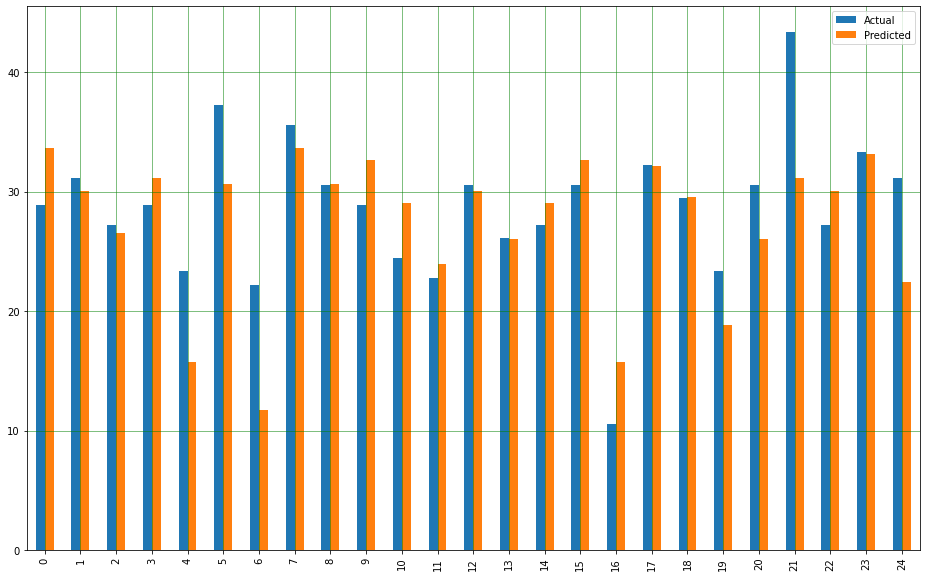

In [13]:
# Visualize the results on the graph.
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

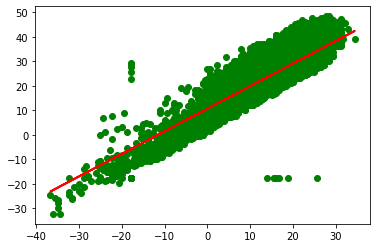

In [17]:
# Plot Straight line with the test data
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [19]:
# Lets evaluate Metrics:

from sklearn import metrics

print('Mean Absolute Error    : ',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error     : ',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


Mean Absolute Error    :  3.19932917837853
Mean Squared Error     :  17.631568097568447
Root Mean Squared Error:  4.198996082109204


Mean Sqaured Error is 4.19 which is more than 10% of the mean value of 22.411631.
This means our algorithm is not accurate though it made good preditions. 

# Regresssion Using RandomForest Regressor

In [20]:
# Data is ready to Fit (Train) the Model using Randon Forest Regression Model.
from sklearn.ensemble import RandomForestRegressor 
regressor= RandomForestRegressor()
regressor.fit(X_train, y_train)

/usr/local/Cellar/jupyterlab/2.0.1/libexec/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [21]:
y_pred = regressor.predict(X_test)
df= pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':y_pred.flatten()})
df

,Actual,Predicted
0,28.888889,31.834918
1,31.111111,30.491503
2,27.222222,28.337153
3,28.888889,30.579354
4,23.333333,16.602552
...,...,...
23803,32.777778,30.828713
23804,32.222222,29.826495
23805,31.111111,31.104410
23806,31.111111,30.580423


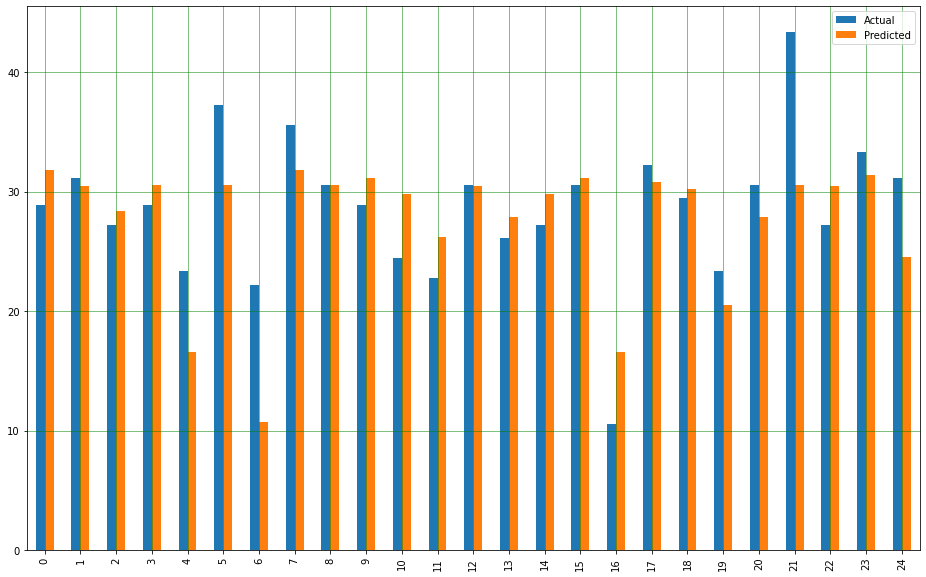

In [22]:
# Visualize the results on the graph.
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

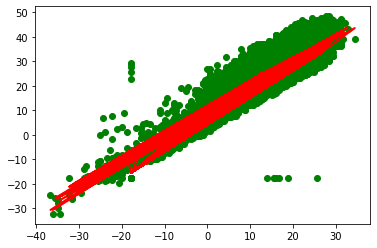

In [23]:
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [24]:
# Lets evaluate Metrics:

from sklearn import metrics

print('Mean Absolute Error    : ',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error     : ',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error    :  2.834264614670006
Mean Squared Error     :  14.955698858898495
Root Mean Squared Error:  3.86725986441285


In [31]:
from sklearn.tree import DecisionTreeRegressor
regressor= DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [32]:
y_pred = regressor.predict(X_test)
df= pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':y_pred.flatten()})
df

,Actual,Predicted
0,28.888889,31.825285
1,31.111111,30.491338
2,27.222222,28.336878
3,28.888889,30.579136
4,23.333333,16.616777
...,...,...
23803,32.777778,30.830507
23804,32.222222,29.823365
23805,31.111111,31.108031
23806,31.111111,30.576867


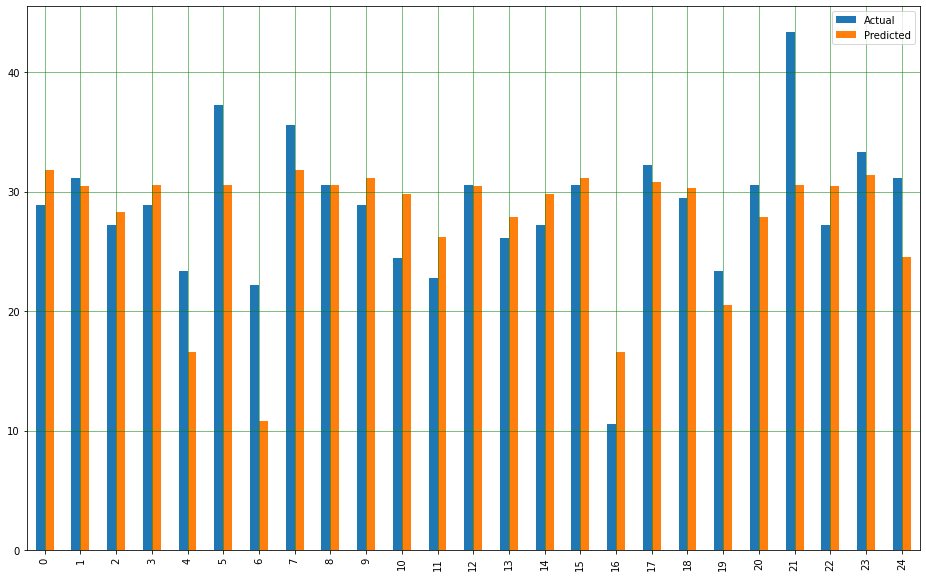

In [33]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

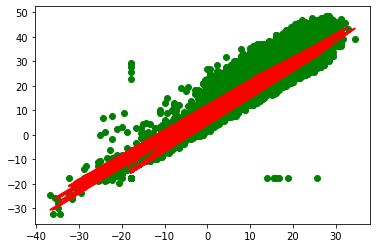

Mean Absolute Error    :  2.834425107012998
Mean Squared Error     :  14.954548037604166
Root Mean Squared Error:  3.867111071278425


In [34]:
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

from sklearn import metrics

print('Mean Absolute Error    : ',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error.    : ',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

In [63]:
df= pd.DataFrame({'MEA':[3.19932917837853,2.834264614670006,2.834425107012998], 
                  'MSE':[17.631568097568447,14.955698858898495,14.954548037604166], 
                  'RMSE':[4.198996082109204,3.86725986441285,3.867111071278425]},['Linear Regression', 'Random Forest', 'DecisionTreeRegressor'])
df.transpose


<bound method DataFrame.transpose of                             MEA        MSE      RMSE
Linear Regression      3.199329  17.631568  4.198996
Random Forest          2.834265  14.955699  3.867260
DecisionTreeRegressor  2.834425  14.954548  3.867111>

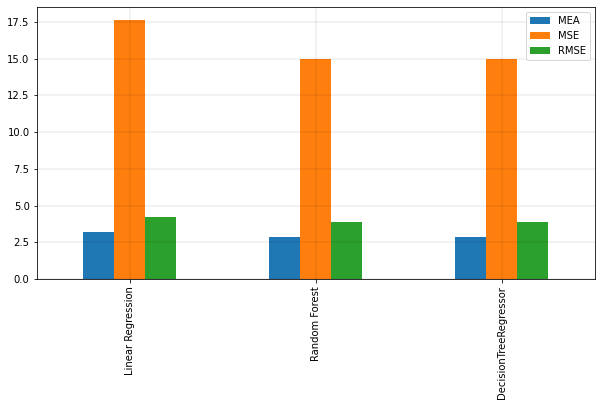

In [72]:

df.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='green')
plt.grid(which='major', linestyle='-', linewidth='0.1', color='black')
plt.show()